In [18]:
import pandas as pd
import seaborn as sns
import numpy as np 
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

In [2]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


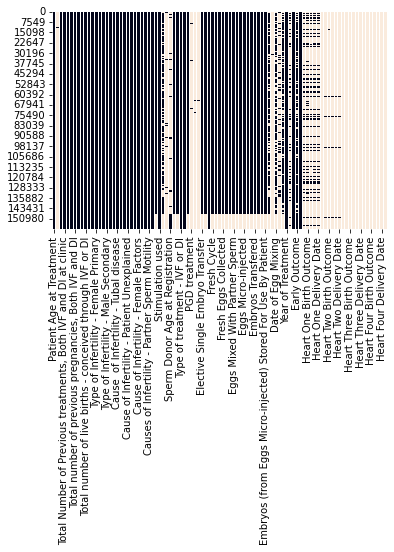

In [3]:
sns.heatmap(df.isnull(), cbar=False)

In [4]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Original number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count, how = 'any')
col_mod = mod_df.columns

# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

print('New number of columns :', len(col_mod))
print(mod_df.columns)

Original number of columns : 95
New number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [6]:
# Dropping more columns
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Partner Sperm Concentration', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Female Factors', axis=1, inplace = True)
mod_df.drop('Causes of Infertility - Partner Sperm Motility', axis=1, inplace = True)
mod_df.drop('Cause of Infertility -  Partner Sperm Immunological factors', axis=1, inplace = True)
mod_df.drop('Specific treatment type', axis=1, inplace = True)

# obtaining the shape and size of mod_df after removing more columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


shape of dataframe (158519, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [7]:
print(mod_df.nunique())

Patient Age at Treatment                                7
Total Number of Previous IVF cycles                     7
Total number of IVF pregnancies                        12
Total number of live births - conceived through IVF     6
Type of Infertility - Female Primary                    2
Type of Infertility - Female Secondary                  2
Type of Infertility - Male Primary                      2
Type of Infertility - Male Secondary                    2
Type of Infertility -Couple Primary                     2
Type of Infertility -Couple Secondary                   2
Cause  of Infertility - Tubal disease                   2
Cause of Infertility - Ovulatory Disorder               2
Cause of Infertility - Male Factor                      2
Cause of Infertility - Patient Unexplained              2
Cause of Infertility - Endometriosis                    2
Cause of Infertility - Cervical factors                 2
Cause of Infertility -  Partner Sperm Morphology        2
Stimulation us

In [8]:
# Show each unique value in every column
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
[0 1 2 4 3 5 '0' '1' '2' '3' '4' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number

In [9]:
# Fixing outliers and errors in data
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)
mod_df['Total Number of Previous IVF cycles'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Sperm From'].replace({'Partner': 0, 'Donor': 1, 'Partner & Donor': 2}, inplace=True)
mod_df['Patient Age at Treatment'].replace({'40-42': 0, '45-50': 1, '35-37': 2, '18 - 34': 3, '43-44': 4, '38-39': 5}, inplace=True)
# mod_df['Total number of live births - conceived through IVF'].replace({2: 1, 3: 1, 4: 1, 5: 1}, inplace=True)
mod_df.fillna(value=mod_df['Embryos Transfered'].mean().astype(int), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
# Checking each unique value in every column
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
[0 1 2]
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1. 2. 0. 3.]


In [11]:
# obtaining the shape and size of mod_df after fixing outliers and errors in data
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

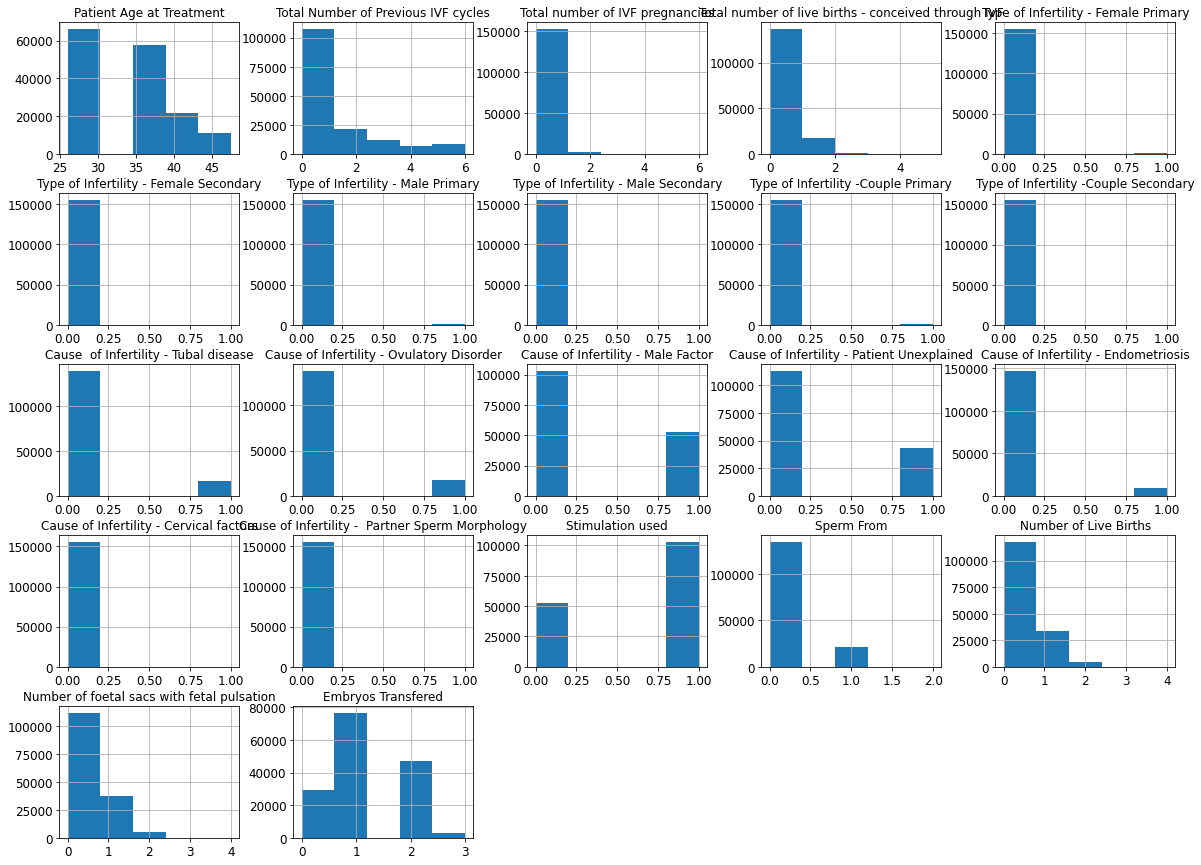

In [12]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

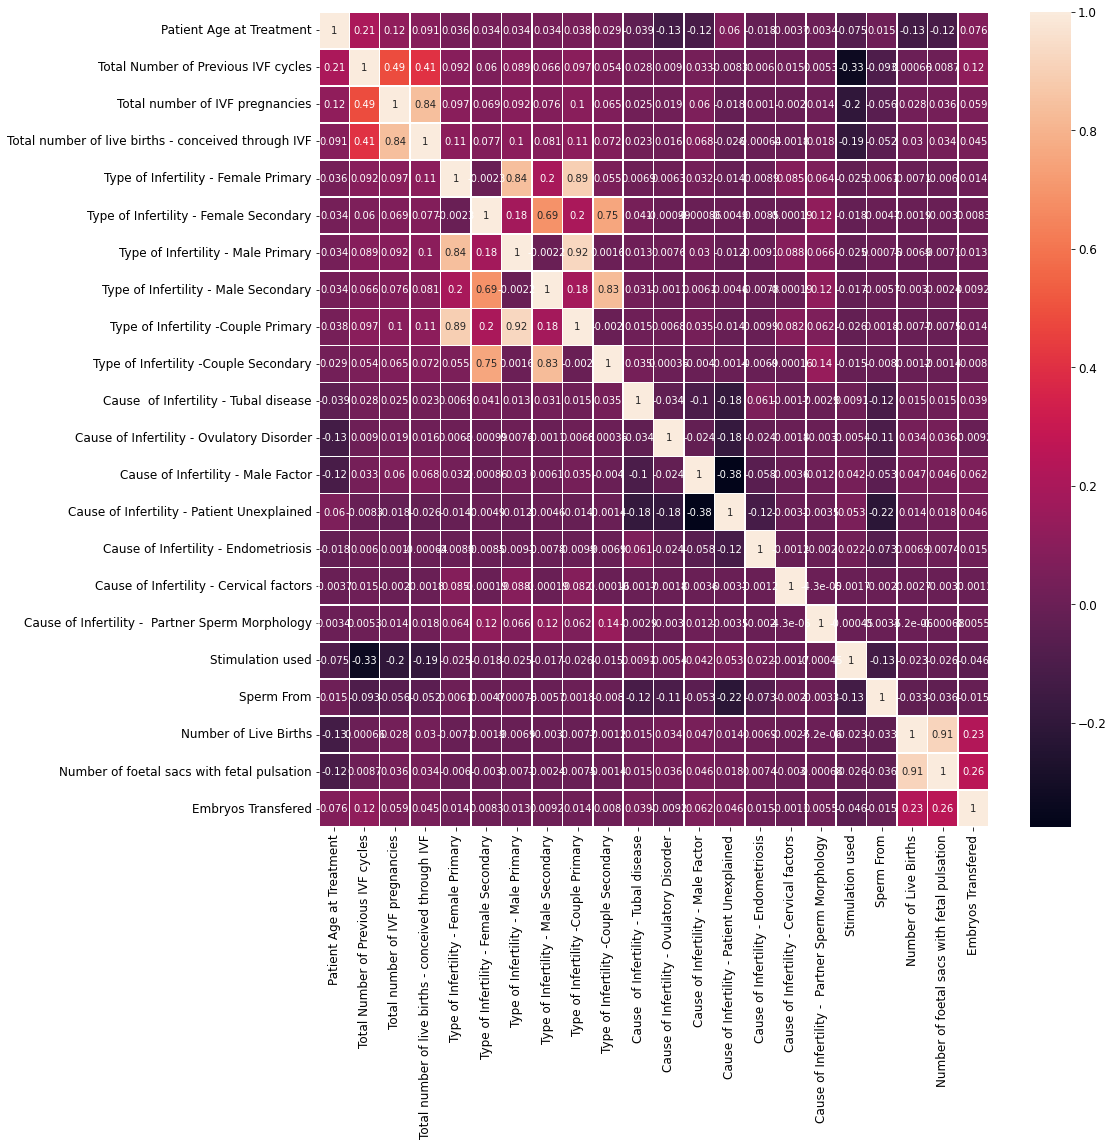

In [13]:
fig, ax = plt.subplots(figsize=(15,15))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [14]:
# Add a new column named 'LiveBirth'
mod_df['LiveBirth'] = [1 if x >= 1 else 0 for x in mod_df['Total number of live births - conceived through IVF']]

# Print the DataFrame
print(mod_df['LiveBirth'].value_counts())

0    137162
1     18863
Name: LiveBirth, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
#target_columns 
Y = ['Total number of live births - conceived through IVF', 'Number of Live Births', 'LiveBirth']
y = 'LiveBirth'
#feature_columns 
x = [c for c in mod_df.columns if c not in Y]

print(y)
print(x)

LiveBirth
['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Sperm From', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(mod_df[x], mod_df[y], test_size=0.3, random_state=0)

In [31]:
dt = DecisionTreeClassifier(random_state=1024)

In [34]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6]
             }
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             verbose=True)

In [37]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       min_samples_split=5, random_state=1024)

In [38]:
#Training the model
tree_clas = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       min_samples_split=5, random_state=1024)
tree_clas.fit(X_train, y_train)
y_pred = tree_clas.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40134   967]
 [ 2754  2953]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     41101
           1       0.75      0.52      0.61      5707

    accuracy                           0.92     46808
   macro avg       0.84      0.75      0.78     46808
weighted avg       0.91      0.92      0.91     46808



In [52]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logreg = LogisticRegression()

In [62]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

In [63]:
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [64]:
final_model2 = best_clf.best_estimator_
final_model2

Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.012742749857031334, penalty='l1',
                                    solver='liblinear'))])

In [79]:
# Takes about 3 minutes to run 
log_reg = LogisticRegression(C=0.012742749857031334, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.012742749857031334, penalty='l1', solver='liblinear')

In [80]:
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     41101
           1       0.77      1.00      0.87      5707

    accuracy                           0.96     46808
   macro avg       0.88      0.98      0.92     46808
weighted avg       0.97      0.96      0.97     46808



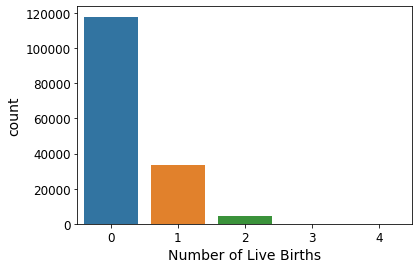

In [41]:
sns.countplot(x='Number of Live Births', data=mod_df)

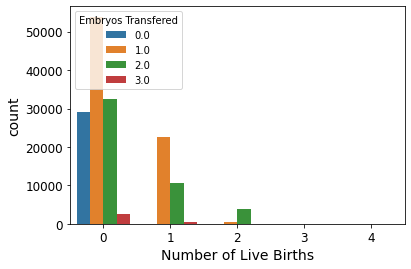

In [43]:
sns.countplot(x='Number of Live Births', hue='Embryos Transfered', data=mod_df)

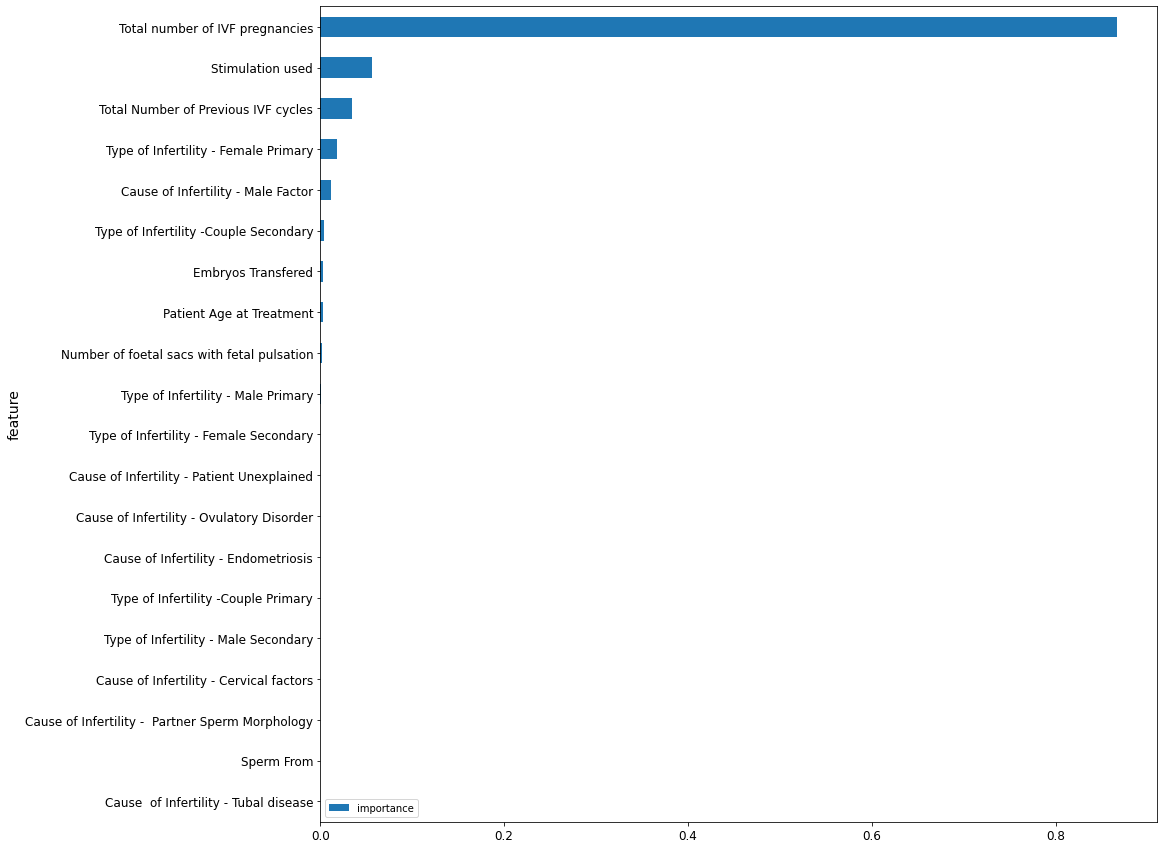

In [47]:
# Create a dataframe and plot of the importance of each feature
features = pd.DataFrame()
features['feature'] = x
features['importance'] = tree_clas.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features[-20:].plot(kind='barh', figsize=(15, 15))